#### Import Statements

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
#from PIL import Image

# Loading the Data

In [3]:
image_resolution = 384

(384, 384)


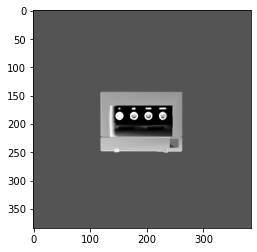

In [4]:
# Example of loading the first image
image_path = "GameCubeRotations\gamecube_{}_{}.png".format(image_resolution, 0)
image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
input_arr =tf. keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
print(input_arr.shape)
plt.imshow(input_arr, cmap="Greys")
plt.show()

In [5]:
data = []
for i in range(360):
    image_path = "GameCubeRotations\gamecube_{}_{}.png".format(image_resolution, i)
    image = tf.keras.preprocessing.image.load_img(image_path, color_mode="grayscale")
    input_arr = tf.keras.preprocessing.image.img_to_array(image).reshape(image_resolution, image_resolution)
    data.append(input_arr)

In [6]:
data = np.array(data)

In [7]:
target = np.array(range(360))

In [8]:
print(data.shape)

(360, 384, 384)


# Training on the Whole Data Set

In [78]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.20, random_state=5)

In [100]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(image_resolution, image_resolution)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation="linear")
])

In [101]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

In [102]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test,y_test))

Epoch 1/30
9/9 [==============================] - 10s 1s/step - loss: 1379650816.0000 - val_loss: 80043472.0000
Epoch 2/30
9/9 [==============================] - 5s 569ms/step - loss: 41207384.0000 - val_loss: 40682420.0000
Epoch 3/30
9/9 [==============================] - 4s 430ms/step - loss: 15947620.0000 - val_loss: 19051982.0000
Epoch 4/30
9/9 [==============================] - 5s 516ms/step - loss: 6939480.0000 - val_loss: 7591803.5000
Epoch 5/30
9/9 [==============================] - 5s 587ms/step - loss: 2947054.2500 - val_loss: 3175731.0000
Epoch 6/30
9/9 [==============================] - 4s 427ms/step - loss: 1241736.5000 - val_loss: 1227266.5000
Epoch 7/30
9/9 [==============================] - 4s 402ms/step - loss: 537549.0000 - val_loss: 158208.2188
Epoch 8/30
9/9 [==============================] - 4s 397ms/step - loss: 191039.2188 - val_loss: 52193.4844
Epoch 9/30
9/9 [==============================] - 4s 414ms/step - loss: 82355.6016 - val_loss: 104413.8672
Epoch 10/30


In [82]:
test_predictions = model.predict(X_test)

In [89]:
train_predictions = model.predict(X_train)

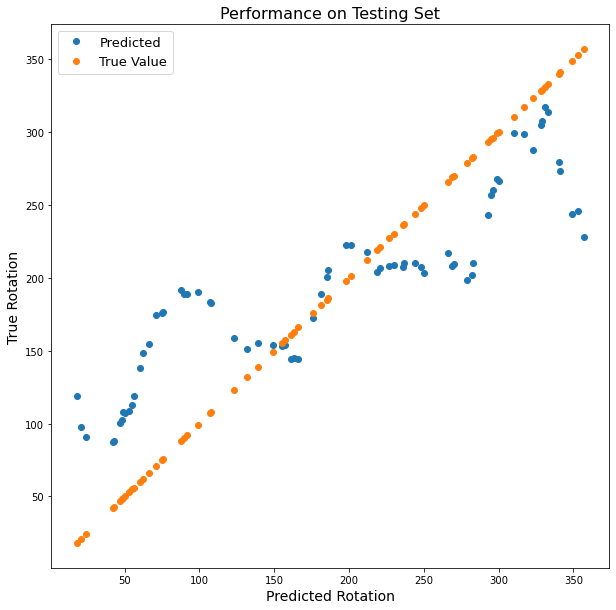

In [92]:
size = len(y_test)
plt.figure(figsize=(10,10))
plt.plot(y_test, list(test_predictions), 'o', label='Predicted', lw=3)
plt.plot(y_test, y_test, 'o', label='True Value', lw=3)
plt.ylabel("True Rotation", fontsize=14)
plt.xlabel("Predicted Rotation", fontsize=14)
plt.legend(fontsize=13)
plt.title("Performance on Testing Set", fontsize=16)
plt.show()

In [98]:
print(history.history)

{'loss': [4263.98779296875, 4286.90966796875, 4910.32421875, 4205.7490234375, 4036.092041015625, 3669.9150390625, 3569.554931640625, 3293.78564453125, 3219.0732421875, 3339.184814453125, 3415.670654296875, 3960.07080078125, 3195.51611328125, 3068.945556640625, 2987.080810546875, 2869.2158203125, 2808.037841796875, 2880.29736328125, 2823.471923828125, 2957.8173828125, 2556.83837890625, 2515.466796875, 2698.33447265625, 2457.194580078125, 2411.46875, 2559.232177734375, 2320.06787109375, 2315.303955078125, 2341.17626953125, 2583.676025390625], 'val_loss': [3451.82568359375, 4398.19873046875, 3097.2275390625, 4149.2099609375, 3013.65869140625, 2888.9755859375, 2756.154052734375, 2680.2109375, 2597.5, 2578.5732421875, 4350.8779296875, 2591.973388671875, 2591.8388671875, 2347.374267578125, 3121.717041015625, 2207.1318359375, 2591.3603515625, 2339.795166015625, 2114.927001953125, 2228.622314453125, 2021.8150634765625, 2257.1181640625, 2291.579833984375, 2045.826171875, 1983.181884765625, 1963

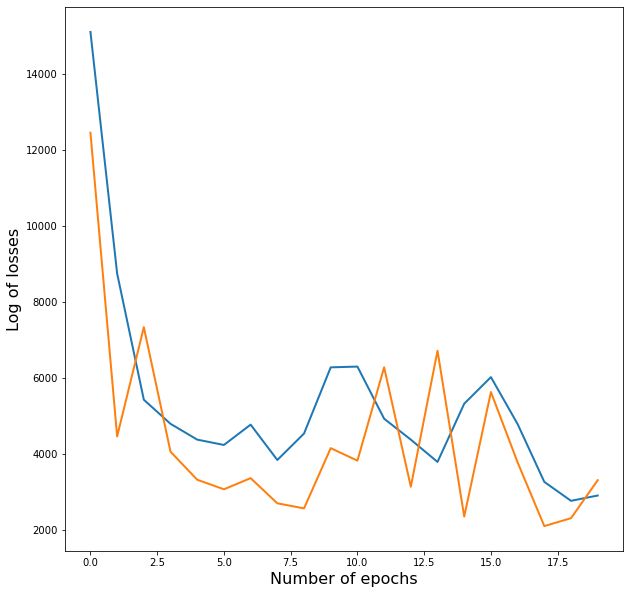

In [107]:
losses = history.history['loss'][10:]
val_losses = history.history['val_loss'][10:]
#log_losses = [np.log(x) for x in losses]

plt.figure(figsize=(10,10))
plt.plot(range(len(losses)), losses, lw=2)
plt.plot(range(len(losses)), val_losses, lw=2)
plt.ylabel("Log of losses", fontsize=16)
plt.xlabel("Number of epochs", fontsize=16)
plt.show()

# Training with Half of the Data

In [108]:
half_data = data[0:180]
half_target = np.array(range(180))
print(half_data.shape)

(180, 384, 384)


In [130]:
X_train, X_test, y_train, y_test = train_test_split(half_data, half_target, test_size=0.20, random_state=10)

In [131]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(image_resolution, image_resolution)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation="linear")
])

In [132]:
model.compile(optimizer='adam',
              loss='mean_squared_error')

In [133]:
history = model.fit(X_train, y_train, epochs=35, validation_data=(X_test,y_test), batch_size=8)

Epoch 1/35
18/18 [==============================] - 6s 337ms/step - loss: 284380320.0000 - val_loss: 18712964.0000
Epoch 2/35
18/18 [==============================] - 6s 308ms/step - loss: 6400626.5000 - val_loss: 4340798.0000
Epoch 3/35
18/18 [==============================] - 4s 200ms/step - loss: 1168948.1250 - val_loss: 423155.7188
Epoch 4/35
18/18 [==============================] - 3s 194ms/step - loss: 196316.8125 - val_loss: 41479.7461
Epoch 5/35
18/18 [==============================] - 3s 188ms/step - loss: 35446.2227 - val_loss: 5474.4956
Epoch 6/35
18/18 [==============================] - 3s 191ms/step - loss: 8344.3447 - val_loss: 3437.1853
Epoch 7/35
18/18 [==============================] - 4s 198ms/step - loss: 3403.7927 - val_loss: 1493.6063
Epoch 8/35
18/18 [==============================] - 3s 190ms/step - loss: 1953.9701 - val_loss: 3022.2385
Epoch 9/35
18/18 [==============================] - 4s 195ms/step - loss: 1827.8557 - val_loss: 1902.3273
Epoch 10/35
18/18 [===

In [134]:
test_predictions = model.predict(X_test)

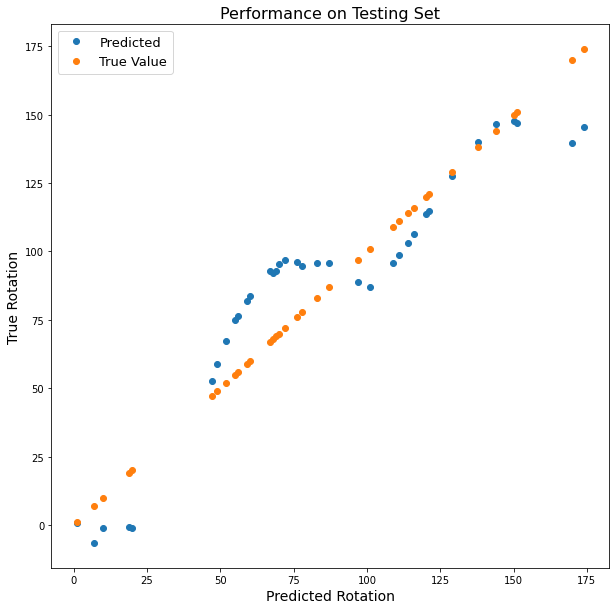

In [135]:
size = len(y_test)
plt.figure(figsize=(10,10))
plt.plot(y_test, list(test_predictions), 'o', label='Predicted', lw=3)
plt.plot(y_test, y_test, 'o', label='True Value', lw=3)
plt.ylabel("True Rotation", fontsize=14)
plt.xlabel("Predicted Rotation", fontsize=14)
plt.legend(fontsize=13)
plt.title("Performance on Testing Set", fontsize=16)
plt.show()

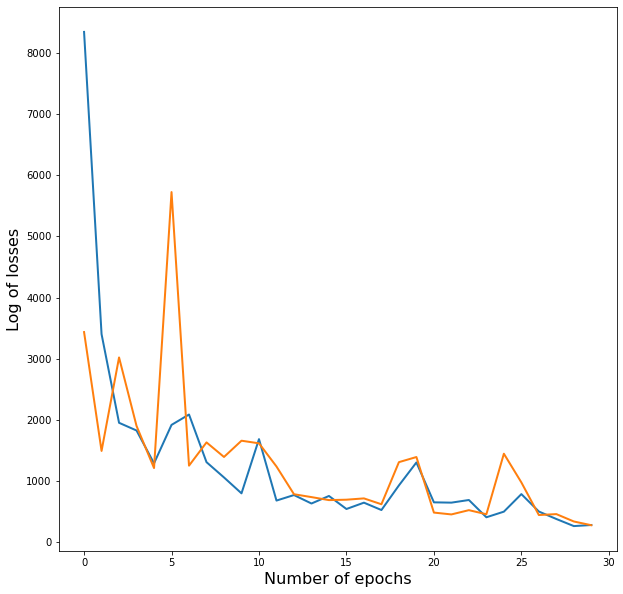

In [136]:
losses = history.history['loss'][5:]
val_losses = history.history['val_loss'][5:]
#log_losses = [np.log(x) for x in losses]

plt.figure(figsize=(10,10))
plt.plot(range(len(losses)), losses, lw=2)
plt.plot(range(len(losses)), val_losses, lw=2)
plt.ylabel("Log of losses", fontsize=16)
plt.xlabel("Number of epochs", fontsize=16)
plt.show()

# Subtracting Images

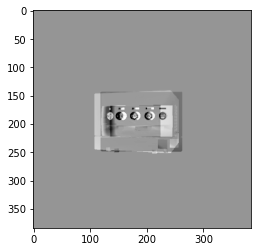

In [39]:
subtracted = data[15] - data[0]
image_arr = subtracted.reshape(image_resolution, image_resolution)
plt.imshow(image_arr, cmap="Greys")
plt.show()

In [ ]:
subtracted_pairs_data = []
subtracted_pairs_target = []
for i in range(90):
    for j in range(i+1, 91):
        subtracted_pairs_data.append(data[j] - data[i])
        subtracted_pairs_target.append(j-i)
subtracted_pairs_data = np.array(subtracted_pairs_data)
print(subtracted_pairs_data.shape)

In [ ]:
subtracted_pairs_target = np.array(subtracted_pairs_target)

In [65]:
subtracted_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(image_resolution, image_resolution)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation="linear")
])

In [66]:
subtracted_model.compile(optimizer='adam',
              loss='mean_squared_error')

In [68]:
subtracted_history = subtracted_model.fit(subtracted_pairs_data, subtracted_pairs_target, epochs=30)

Epoch 1/30
128/128 [==============================] - 271s 2s/step - loss: 101772.4297
Epoch 2/30
128/128 [==============================] - 62s 484ms/step - loss: 1765.9360
Epoch 3/30
128/128 [==============================] - 51s 396ms/step - loss: 1435.9539
Epoch 4/30
128/128 [==============================] - 56s 434ms/step - loss: 465.6048
Epoch 5/30
128/128 [==============================] - 51s 401ms/step - loss: 261.3117
Epoch 6/30
128/128 [==============================] - 63s 491ms/step - loss: 206.0269
Epoch 7/30
128/128 [==============================] - 59s 460ms/step - loss: 336.7796
Epoch 8/30
128/128 [==============================] - 55s 432ms/step - loss: 155.5017
Epoch 9/30
128/128 [==============================] - 59s 465ms/step - loss: 90.3027
Epoch 10/30
128/128 [==============================] - 55s 431ms/step - loss: 107.0279
Epoch 11/30
128/128 [==============================] - 52s 402ms/step - loss: 334.2418
Epoch 12/30
128/128 [=============================

In [72]:
subtracted_by_0 = np.array([data[i] - data[0] for i in range(1, 91)])
subtracted_predictions = subtracted_model.predict(subtracted_by_0)

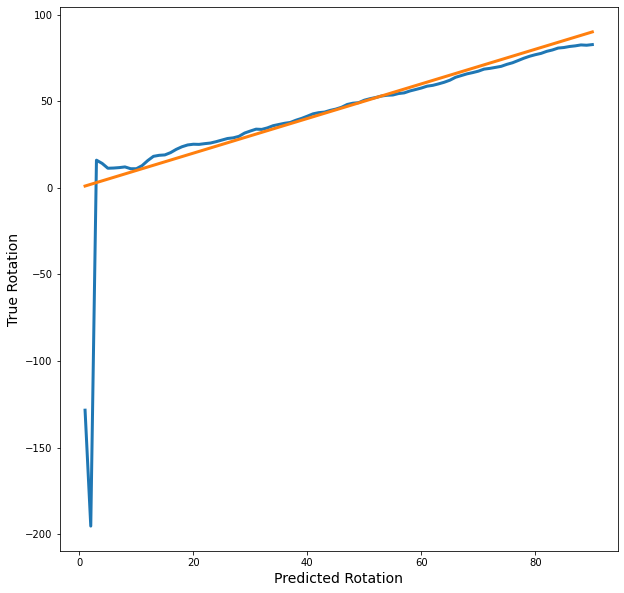

In [74]:
size = len(subtracted_by_0)
plt.figure(figsize=(10,10))
plt.plot(range(1, size+1), list(subtracted_predictions), label='Predicted', lw=3)
plt.plot(range(1, size+1), range(1, size+1), label='True Value', lw=3)
plt.ylabel("True Rotation", fontsize=14)
plt.xlabel("Predicted Rotation", fontsize=14)
plt.show()

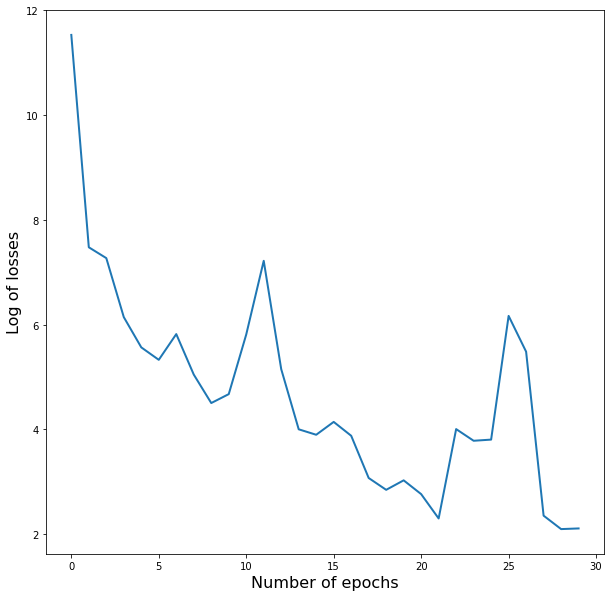

In [75]:
losses = subtracted_history.history['loss']
log_losses = [np.log(x) for x in losses]

plt.figure(figsize=(10,10))
plt.plot(range(len(losses)), log_losses, lw=2)
plt.ylabel("Log of losses", fontsize=16)
plt.xlabel("Number of epochs", fontsize=16)
plt.show()

In [153]:
np.zeros((90*45,384,384))

MemoryError: Unable to allocate 4.45 GiB for an array with shape (4050, 384, 384) and data type float64

In [150]:
print(subtracted_pairs_data.shape)

(4095, 384, 384)
